In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf
import os
import h5py

In [5]:
#import data 
path = 'e:/Processed/'     
#'x:/Steering/Recordings/Processed/'
data, fs = sf.read(path + 'ERB=2_MF_uniBF.wav')
classes = pd.read_csv(path + 'Classes_MF_uniBF.csv')

In [6]:
X = data[:len(data)-1,:data.shape[1]] 
Y = classes.values[:,0]

In [7]:
print(len(Y),len(X),X.shape)

979352 979352 (979352, 180)


In [8]:
#split into training and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=classes)

In [9]:
#do one-hot encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

enc = OneHotEncoder(sparse=False)

In [10]:
integer_encoded_train = trainY.reshape(len(trainY), 1)
onehot_encoded_train = enc.fit_transform(integer_encoded_train)

integer_encoded_test = testY.reshape(len(testY), 1)
onehot_encoded_test = enc.fit_transform(integer_encoded_test)

In [11]:
onehot_encoded_train[:10,:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [12]:
#DC removal 
trainX -= (np.mean(trainX, axis=0) + 1e-8)
testX -= (np.mean(testX, axis=0) + 1e-8)

In [13]:
clf = keras.Sequential()
opt = keras.optimizers.Adam(lr=0.01)

In [14]:

clf.add(keras.layers.Dense(
  units = 91,
  input_dim = trainX.shape[1],      
  activation = 'tanh'
))
clf.add(keras.layers.Dropout(0.5))

clf.add(keras.layers.Dense(
    units = onehot_encoded_train.shape[1],  
    input_dim = 91,
    activation = 'softmax'
))


In [15]:
clf.compile(loss='mean_squared_error',
    optimizer=opt,
           metrics=['categorical_accuracy'])

In [16]:
history = clf.fit(trainX,onehot_encoded_train,
                 batch_size = 100, epochs = 20,
                 verbose = 1,
                 validation_split = 0.2)

Train on 626784 samples, validate on 156697 samples
Epoch 1/20
626784/626784 [==============================] - 11s 18us/step - loss: 0.0826 - categorical_accuracy: 0.8875 - val_loss: 0.0641 - val_categorical_accuracy: 0.9129
Epoch 2/20
626784/626784 [==============================] - 12s 18us/step - loss: 0.0673 - categorical_accuracy: 0.9088 - val_loss: 0.0520 - val_categorical_accuracy: 0.9304
Epoch 3/20
626784/626784 [==============================] - 12s 18us/step - loss: 0.0597 - categorical_accuracy: 0.9196 - val_loss: 0.0454 - val_categorical_accuracy: 0.9391
Epoch 4/20
626784/626784 [==============================] - 12s 19us/step - loss: 0.0558 - categorical_accuracy: 0.9259 - val_loss: 0.0426 - val_categorical_accuracy: 0.9434
Epoch 5/20
626784/626784 [==============================] - 12s 18us/step - loss: 0.0532 - categorical_accuracy: 0.9296 - val_loss: 0.0408 - val_categorical_accuracy: 0.9463
Epoch 6/20
626784/626784 [==============================] - 11s 18us/step - lo

In [17]:

testY[1:100], clf.predict_classes(testX[1:100,:])

(array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64))

In [17]:
clf.evaluate(testX,onehot_encoded_test,verbose=1)

195871/195871 [==============================] - 4s 19us/step


[0.03268172402412567, 0.9578089661006781]

In [18]:
# save model and weights
#clf_json = clf.to_json()
#with open("NN_OwnVoice_180-91-2_inputs_uniBF.json", "w") as json_file:
#    json_file.write(clf_json)
    
#clf.save_weights("NN_OwnVoice_180-91-2_inputs_uniBF_weights.h5")

In [19]:
#np.save('TestX_NN_OwnVoice_uniBF',testX), np.save('TestY_NN_OwnVoice_uniBF',testY),
#np.save('OneHot_testY_uniBF',onehot_encoded_test)

In [18]:
import matplotlib.pyplot as plt

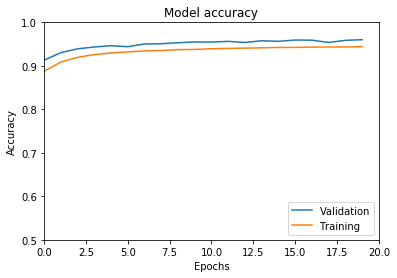

In [19]:
plt.plot(history.history['val_categorical_accuracy'])
plt.plot(history.history['categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.axis([0, 20, 0.5, 1])
plt.legend(['Validation', 'Training'], loc='lower right')
plt.savefig('Accuracy_MF_uniBF.png',dpi=150)

In [24]:
clf.layers


In [25]:
#saving weights
weights_first_layer = clf.layers[0].get_weights()[0]
biases_first_layer = clf.layers[0].get_weights()[1]

weights_second_layer = clf.layers[2].get_weights()[0]
biases_second_layer = clf.layers[2].get_weights()[1]


weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])


weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / abs(biases_second_layer).max()


weights_first_layer_norm.shape, weights_second_layer_norm.shape

abs(weights_first_layer).max(), abs(weights_second_layer).max()

np.savetxt('weights_first_layer_norm_NN_180-91-2_ownVoice.txt',
           weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_180-91-2_ownVoice.txt',
           weights_second_layer_norm,delimiter= ',')


In [31]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(testY,clf.predict_classes(testX)) 

a = [0 for x in range(2)]
cfm_norm = np.zeros((2,2))#[[0 for x in range(5)] for y in range(5)]

for idx in range(2):
    cfm_norm[idx,:] = cfm[idx,:] / sum(cfm[idx,:]) #len(testY[testY == idx + 1])      

cfm_norm = np.around(cfm_norm,decimals=3)

#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center',fontsize=15)
  
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Other','Own-voice'])
ax.set_yticklabels(['Other','Own-voice'])
ax.yaxis.set_label_coords(1.1,0.5)
ax.xaxis.set_label_coords(0.51,-0.07)
ax.set_xlabel('Predicted Class',fontsize=13)
ax.set_ylabel('True Class',fontsize=13)
fig.savefig('Conf_Matrix_OwnVoice_uni.png',dpi=80)


In [1]:
FP = cfm_norm.sum(axis=0) - np.diag(cfm_norm)  
FN = cfm_norm.sum(axis=1) - np.diag(cfm_norm)
TP = np.diag(cfm_norm)
TN = cfm_norm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

ACC.mean(),TPR.mean(), FPR.mean()

NameError: name 'cfm_norm' is not defined